In [1]:
import os
import shutil
import random
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import layers, models, regularizers
from tensorflow.keras.optimizers import Adamax
from tensorflow.keras.callbacks import EarlyStopping, Callback,ModelCheckpoint
from tensorflow.keras.preprocessing import image_dataset_from_directory

In [2]:
! pip install -q kaggle

In [3]:
!mkdir -p ~/.kaggle
!mv kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [4]:
!kaggle datasets download -d rakhshandamujib/armd-curated-dataset-2023
!kaggle datasets download -d gunavenkatdoddi/eye-diseases-classification

Dataset URL: https://www.kaggle.com/datasets/rakhshandamujib/armd-curated-dataset-2023
License(s): unknown
 96% 41.0M/42.7M [00:01<00:00, 38.3MB/s]
100% 42.7M/42.7M [00:01<00:00, 36.5MB/s]
Dataset URL: https://www.kaggle.com/datasets/gunavenkatdoddi/eye-diseases-classification
License(s): ODbL-1.0
 99% 725M/736M [00:10<00:00, 73.7MB/s]
100% 736M/736M [00:10<00:00, 71.5MB/s]


In [5]:
!unzip /content/armd-curated-dataset-2023.zip
!unzip /content/eye-diseases-classification.zip

Archive:  /content/armd-curated-dataset-2023.zip
  inflating: All ARMD images/0_1kIM_10_ARMD.png  
  inflating: All ARMD images/0_1kIM_11_ARMD.png  
  inflating: All ARMD images/0_1kIM_13_ARMD.png  
  inflating: All ARMD images/0_1kIM_14_ARMD.png  
  inflating: All ARMD images/0_1kIM_15_ARMD.png  
  inflating: All ARMD images/0_1kIM_16_ARMD.png  
  inflating: All ARMD images/0_1kIM_17_ARMD.png  
  inflating: All ARMD images/0_1kIM_18_ARMD.png  
  inflating: All ARMD images/0_1kIM_19_ARMD.png  
  inflating: All ARMD images/0_1kIM_1_ARMD.png  
  inflating: All ARMD images/0_1kIM_20_ARMD.png  
  inflating: All ARMD images/0_1kIM_22_ARMD.png  
  inflating: All ARMD images/0_1kIM_23_ARMD.png  
  inflating: All ARMD images/0_1kIM_24_ARMD.png  
  inflating: All ARMD images/0_1kIM_25_ARMD.png  
  inflating: All ARMD images/0_1kIM_26_ARMD.png  
  inflating: All ARMD images/0_1kIM_28_ARMD.png  
  inflating: All ARMD images/0_1kIM_29_ARMD.png  
  inflating: All ARMD images/0_1kIM_2_ARMD.png  
  i

In [6]:
'''
# Tentukan path direktori utama
main_directory = "/content/datasets"

# Daftar nama folder yang ingin dihapus
folders_to_delete = ["hypertension", "myopia", "others"]

# Loop setiap sub-folder dan hapus yang sesuai
for root, dirs, files in os.walk(main_directory):
    for dir_name in dirs:
        if dir_name in folders_to_delete:
            folder_path = os.path.join(root, dir_name)
            shutil.rmtree(folder_path)
            print(f"{folder_path} berhasil dihapus.")
'''

'\n# Tentukan path direktori utama\nmain_directory = "/content/datasets"\n\n# Daftar nama folder yang ingin dihapus\nfolders_to_delete = ["hypertension", "myopia", "others"]\n\n# Loop setiap sub-folder dan hapus yang sesuai\nfor root, dirs, files in os.walk(main_directory):\n    for dir_name in dirs:\n        if dir_name in folders_to_delete:\n            folder_path = os.path.join(root, dir_name)\n            shutil.rmtree(folder_path)\n            print(f"{folder_path} berhasil dihapus.")\n'

In [7]:
dataset_path = "/content/dataset"  # Ganti dengan path folder dataset Anda
subfolder_name = "armd"

# Buat path lengkap untuk subfolder
subfolder_path = os.path.join(dataset_path, subfolder_name)

# Buat subfolder jika belum ada
if not os.path.exists(subfolder_path):
    os.makedirs(subfolder_path)
    print(f"Subfolder '{subfolder_name}' berhasil dibuat di '{dataset_path}'")
else:
    print(f"Subfolder '{subfolder_name}' sudah ada di '{dataset_path}'")

Subfolder 'armd' berhasil dibuat di '/content/dataset'


In [8]:
'''
# Pindahkan file pada dataset ke datasets
source_folder = '/content/dataset'
destination_folder = '/content/datasets'

# Daftar nama folder yang ada di source yang akan dipindahkan
folder_names = ['cataract', 'diabetes', 'glaucoma', 'normal']

# Loop melalui setiap folder di folder_names
for folder_name in folder_names:
    src_path = os.path.join(source_folder, folder_name)
    dest_path = os.path.join(destination_folder, folder_name)

    # Cek apakah folder tujuan ada
    if os.path.exists(src_path) and os.path.exists(dest_path):
        # Pindahkan semua file dari src_path ke dest_path
        for filename in os.listdir(src_path):
            file_source = os.path.join(src_path, filename)
            file_destination = os.path.join(dest_path, filename)

            # Pindahkan file
            shutil.move(file_source, file_destination)
        print(f"File dari folder '{folder_name}' berhasil dipindahkan.")
    else:
        print(f"Folder '{folder_name}' tidak ditemukan di salah satu lokasi.")

print("Proses pemindahan selesai.")
'''

'\n# Pindahkan file pada dataset ke datasets\nsource_folder = \'/content/dataset\'\ndestination_folder = \'/content/datasets\'\n\n# Daftar nama folder yang ada di source yang akan dipindahkan\nfolder_names = [\'cataract\', \'diabetes\', \'glaucoma\', \'normal\']\n\n# Loop melalui setiap folder di folder_names\nfor folder_name in folder_names:\n    src_path = os.path.join(source_folder, folder_name)\n    dest_path = os.path.join(destination_folder, folder_name)\n\n    # Cek apakah folder tujuan ada\n    if os.path.exists(src_path) and os.path.exists(dest_path):\n        # Pindahkan semua file dari src_path ke dest_path\n        for filename in os.listdir(src_path):\n            file_source = os.path.join(src_path, filename)\n            file_destination = os.path.join(dest_path, filename)\n\n            # Pindahkan file\n            shutil.move(file_source, file_destination)\n        print(f"File dari folder \'{folder_name}\' berhasil dipindahkan.")\n    else:\n        print(f"Folder \'

In [9]:
# Folder Asal
source_folder2 = '/content/All ARMD images'
# Folder tujuan
destination_folder2 = '/content/dataset/armd'

# Memindahkan semua file dari folder sumber ke folder tujuan
for filename in os.listdir(source_folder2):
    source_file = os.path.join(source_folder2, filename)
    destination_file = os.path.join(destination_folder2, filename)

    # Memindahkan file
    shutil.move(source_file, destination_file)

print("Semua file telah berhasil dipindahkan.")

Semua file telah berhasil dipindahkan.


In [10]:
# Set directory path and parameters
dataset_dir = 'dataset'
batch_size = 32
img_size = (512, 512)  # Sesuaikan dengan ukuran yang diinginkan
train_ratio = 0.7  # 70% untuk train dan 30% untuk validation

In [11]:
# Load data dan bagi menjadi train dan validation
train_ds = image_dataset_from_directory(
    dataset_dir,
    validation_split=1 - train_ratio,
    subset="training",
    seed=123,
    image_size=(512, 512),
    batch_size=32,
    label_mode='categorical'  # Mengubah label menjadi one-hot encoded
)

val_ds = image_dataset_from_directory(
    dataset_dir,
    validation_split=1 - train_ratio,
    subset="validation",
    seed=123,
    image_size=(512, 512),
    batch_size=32,
    label_mode='categorical'  # Mengubah label menjadi one-hot encoded
)


# Verifikasi pembagian data
class_names = train_ds.class_names
print("Classes:", class_names)
print("Total train batches:", tf.data.experimental.cardinality(train_ds).numpy())
print("Total validation batches:", tf.data.experimental.cardinality(val_ds).numpy())

Found 4728 files belonging to 5 classes.
Using 3310 files for training.
Found 4728 files belonging to 5 classes.
Using 1418 files for validation.
Classes: ['armd', 'cataract', 'diabetic_retinopathy', 'glaucoma', 'normal']
Total train batches: 104
Total validation batches: 45


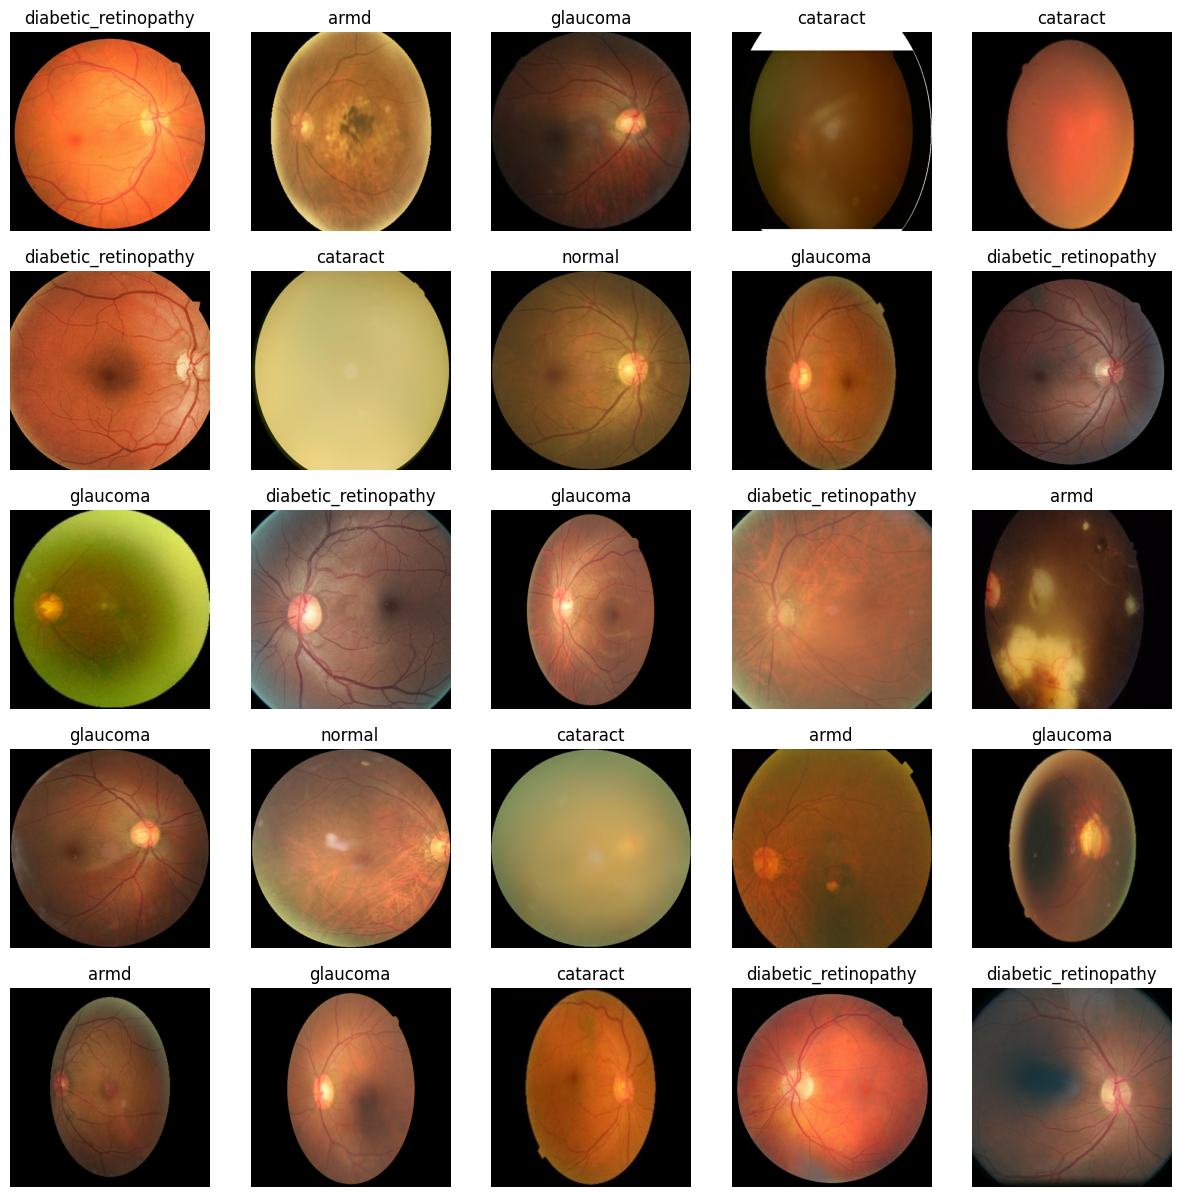

In [12]:
# Fungsi untuk menampilkan beberapa gambar dari setiap kelas dalam batch pertama dataset
def visualize_data(dataset, class_names, num_images=5):
    plt.figure(figsize=(15, 15))
    for images, labels in dataset.take(1):  # Ambil satu batch data
        for i in range(num_images * len(class_names)):
            ax = plt.subplot(len(class_names), num_images, i + 1)
            img = images[i].numpy().astype("uint8")

            # Mendapatkan label kelas
            label = class_names[np.argmax(labels[i])] if labels[i].shape else class_names[labels[i]]

            plt.imshow(img)
            plt.title(label)
            plt.axis("off")

# Mendapatkan nama kelas dari dataset
class_names = train_ds.class_names

# Tampilkan 5 gambar pertama dari setiap kelas
visualize_data(train_ds, class_names)
plt.show()

In [13]:
def create_model():
    # Load the base MobileNetV2 model, excluding the top layer
    base_model = tf.keras.applications.MobileNetV2(
        include_top=False,
        weights='imagenet',
        input_shape=(512, 512, 3)
    )

    # Unfreeze the top layers for fine-tuning
    base_model.trainable = True
    for layer in base_model.layers[:-30]:  # Freeze all layers except the last 30
        layer.trainable = False

    model = models.Sequential([
        layers.Input(shape=(512, 512, 3)),

        # Data augmentation
        layers.Rescaling(1./512),
        layers.RandomFlip('horizontal'),
        layers.RandomRotation(0.2),
        layers.RandomZoom(0.2),
        layers.RandomContrast(0.2),

        # MobileNetV2 base model
        base_model,

        # Pooling and classification layers with regularization
        layers.GlobalAveragePooling2D(),
        layers.Dense(128, activation='relu', kernel_regularizer=regularizers.l2(0.02)),
        layers.BatchNormalization(),
        layers.Dropout(0.5),  # Increase dropout
        layers.Dense(5, activation='softmax')
    ])

    # Compile the model with a lower learning rate for fine-tuning
    model.compile(
      optimizer=Adamax(learning_rate=1e-3),
      loss='categorical_crossentropy',
     metrics=['accuracy']
    )



    return model

In [14]:
model = create_model()

<ipython-input-13-05526e5b53f1>:3: UserWarning: `input_shape` is undefined or non-square, or `rows` is not in [96, 128, 160, 192, 224]. Weights for input shape (224, 224) will be loaded as the default.
  base_model = tf.keras.applications.MobileNetV2(


9406464/9406464 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [15]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ rescaling (Rescaling)                │ (None, 512, 512, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ random_flip (RandomFlip)             │ (None, 512, 512, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ random_rotation (RandomRotation)     │ (None, 512, 512, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ random_zoom (RandomZoom)             │ (None, 512, 512, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ random_contrast (RandomContrast)     │ (None, 512, 512, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ mobilenetv2_1.00_224 (Functional)    │ (None, 16, 16, 1280)        │       2,257,984 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ global_average_pooling2d             │ (None, 1280)                │               0 │
│ (GlobalAveragePooling2D)             │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │         163,968 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization                  │ (None, 128)                 │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 5)                   │             645 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 2,423,109 (9.24 MB)

 Trainable params: 1,691,269 (6.45 MB)

 Non-trainable params: 731,840 (2.79 MB)

In [ ]:
"""
# Membuat custom callback untuk menghentikan training jika akurasi sudah mencapai target
class TargetAccuracyCallback(Callback):
    def __init__(self, target_accuracy=0.9):
        super(TargetAccuracyCallback, self).__init__()
        self.target_accuracy = target_accuracy

    def on_epoch_end(self, epoch, logs=None):
        val_accuracy = logs.get('val_accuracy')
        if val_accuracy is not None and val_accuracy >= self.target_accuracy:
            print(f"\nTarget val_accuracy {self.target_accuracy*100}% tercapai! Menghentikan training.")
            self.model.stop_training = True
"""

In [16]:
# Define EarlyStopping callback
early_stopping = EarlyStopping(
    monitor='val_loss',
    patience= 50,
    restore_best_weights=True,
    verbose=1
)

In [17]:
history = model.fit(
    train_ds,
    epochs=100,
    validation_data=val_ds,
    callbacks=[early_stopping]
)

Epoch 1/100
104/104 ━━━━━━━━━━━━━━━━━━━━ 64s 451ms/step - accuracy: 0.6493 - loss: 5.2808 - val_accuracy: 0.5889 - val_loss: 4.4820
Epoch 2/100
104/104 ━━━━━━━━━━━━━━━━━━━━ 45s 433ms/step - accuracy: 0.8134 - loss: 3.7603 - val_accuracy: 0.4986 - val_loss: 4.0833
Epoch 3/100
104/104 ━━━━━━━━━━━━━━━━━━━━ 80s 417ms/step - accuracy: 0.8389 - loss: 3.0572 - val_accuracy: 0.5289 - val_loss: 3.7748
Epoch 4/100
104/104 ━━━━━━━━━━━━━━━━━━━━ 44s 421ms/step - accuracy: 0.8685 - loss: 2.4954 - val_accuracy: 0.5451 - val_loss: 3.8547
Epoch 5/100
104/104 ━━━━━━━━━━━━━━━━━━━━ 81s 416ms/step - accuracy: 0.8786 - loss: 2.0569 - val_accuracy: 0.5049 - val_loss: 3.3101
Epoch 6/100
104/104 ━━━━━━━━━━━━━━━━━━━━ 92s 513ms/step - accuracy: 0.8802 - loss: 1.7392 - val_accuracy: 0.3829 - val_loss: 3.6220
Epoch 7/100
104/104 ━━━━━━━━━━━━━━━━━━━━ 73s 422ms/step - accuracy: 0.8943 - loss: 1.4775 - val_accuracy: 0.4351 - val_loss: 3.2300
Epoch 8/100
104/104 ━━━━━━━━━━━━━━━━━━━━ 53s 513ms/step - accuracy: 0.8940 -

In [19]:
saved_model_dir = "saved_model"
model.export(saved_model_dir)

Saved artifact at 'saved_model'. The following endpoints are available:

* Endpoint 'serve'
  args_0 (POSITIONAL_ONLY): TensorSpec(shape=(None, 512, 512, 3), dtype=tf.float32, name='keras_tensor_154')
Output Type:
  TensorSpec(shape=(None, 5), dtype=tf.float32, name=None)
Captures:
  132367677990064: TensorSpec(shape=(), dtype=tf.resource, name=None)
  132367677995520: TensorSpec(shape=(), dtype=tf.resource, name=None)
  132367677989888: TensorSpec(shape=(), dtype=tf.resource, name=None)
  132367677984080: TensorSpec(shape=(), dtype=tf.resource, name=None)
  132368107129136: TensorSpec(shape=(), dtype=tf.resource, name=None)
  132368110804608: TensorSpec(shape=(), dtype=tf.resource, name=None)
  132367988862016: TensorSpec(shape=(), dtype=tf.resource, name=None)
  132367941302432: TensorSpec(shape=(), dtype=tf.resource, name=None)
  132367678865104: TensorSpec(shape=(), dtype=tf.resource, name=None)
  132368106219552: TensorSpec(shape=(), dtype=tf.resource, name=None)
  132367290273808

In [21]:
converter = tf.lite.TFLiteConverter.from_saved_model(saved_model_dir)
converter.target_spec.supported_ops = [
    tf.lite.OpsSet.TFLITE_BUILTINS,  # TFLite built-in ops
    tf.lite.OpsSet.SELECT_TF_OPS     # Enable TF Select ops
]
tflite_model = converter.convert()

# Save the TFLite model
tflite_model_file = "model_with_flex_ops.tflite"
with open(tflite_model_file, "wb") as f:
    f.write(tflite_model)

print(f"TFLite model with flex ops saved as {tflite_model_file}")


TFLite model with flex ops saved as model_with_flex_ops.tflite


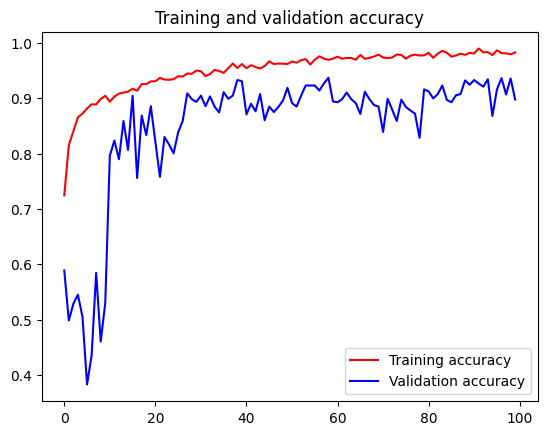

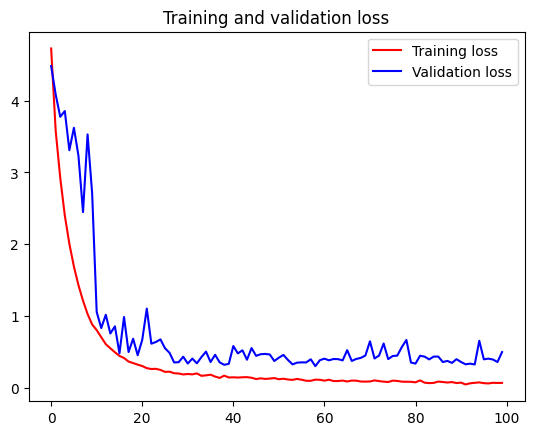

In [22]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend(loc=0)
plt.figure()


plt.plot(epochs, loss, 'r', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend(loc=0)

plt.show()

In [23]:
def zip_saved_model(saved_model_dir, zip_filename):
  """
  Zips the contents of a saved_model directory.

  Args:
    saved_model_dir: The path to the saved_model directory.
    zip_filename: The desired filename for the zip archive.
  """

  try:
    shutil.make_archive(zip_filename, 'zip', saved_model_dir)
    print(f"Saved model zipped successfully to {zip_filename}.zip")
  except Exception as e:
    print(f"Error zipping saved model: {e}")


# Example usage:
saved_model_dir = "saved_model"  # Replace with your saved model directory
zip_filename = "saved_model"  # Replace with your desired zip filename

zip_saved_model(saved_model_dir, zip_filename)

Saved model zipped successfully to saved_model.zip
